           item_id  target_value
2019-01-01   item1            38
2019-01-02   item1            48
2019-01-03   item1            66
2019-01-04   item1            43
2019-01-05   item1            52
...            ...           ...
2019-12-27   item1            88
2019-12-28   item1            46
2019-12-29   item1            55
2019-12-30   item1            57
2019-12-31   item1            51

[365 rows x 2 columns]


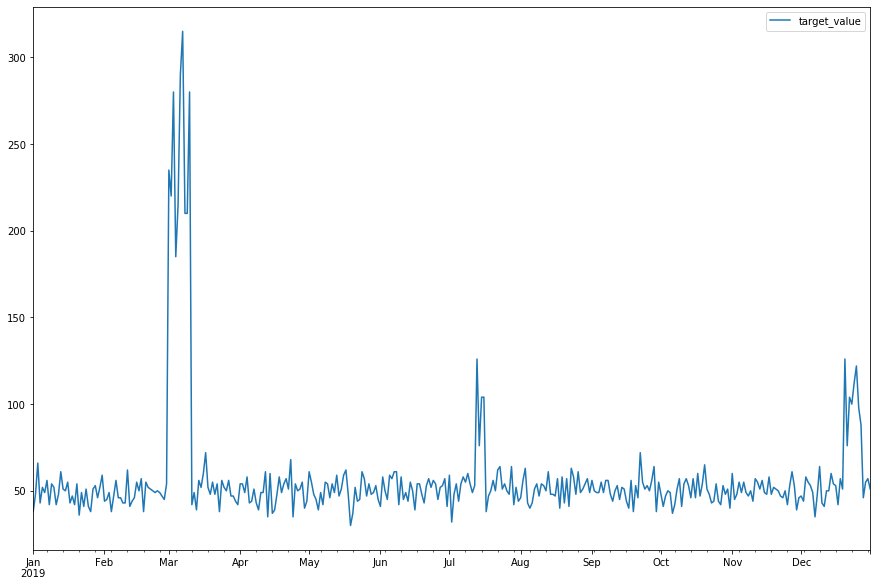

In [16]:
import pandas as pd
import numpy as np
import random

dates = pd.date_range('20190101', periods=365)


# df = pd.DataFrame(np.random.randint(low = 10, high = 50, size =(365, 1)), index=dates, columns=['qunatity'])
# df.columns = ['item_id','timestamp','quantity']

df = pd.DataFrame({'item_id': 'item1',
                    'sales_quantity': np.random.poisson(lam=50, size=365)}, index=dates)

df.loc['20190301':'20190310',['sales_quantity']] = df.loc['20190301':'20190310',['sales_quantity']]*random.randint(2,5)

df.loc['20190713':'20190716',['sales_quantity']] = df.loc['20190713':'20190716',['sales_quantity']]*random.randint(2,5)

df.loc['20191220':'20191223',['sales_quantity']] = df.loc['20191220':'20191223',['sales_quantity']]*random.randint(2,5)
df.loc['20191224':'20191225',['sales_quantity']] = df.loc['20191224':'20191225',['sales_quantity']]*random.randint(2,5)
df.loc['20191226':'20191227',['sales_quantity']] = df.loc['20191226':'20191227',['sales_quantity']]*random.randint(2,5)
print(df)
# df.plot()
df.plot(figsize=(15,10))

           item_id  target_value
2019-01-01  item20          58.0
2019-01-02  item20          47.2
2019-01-03  item20          60.4
2019-01-04  item20          49.6
2019-01-05  item20          62.8
...            ...           ...
2019-12-27  item20         116.0
2019-12-28  item20         122.2
2019-12-29  item20         131.4
2019-12-30  item20         120.6
2019-12-31  item20         115.8

[365 rows x 2 columns]


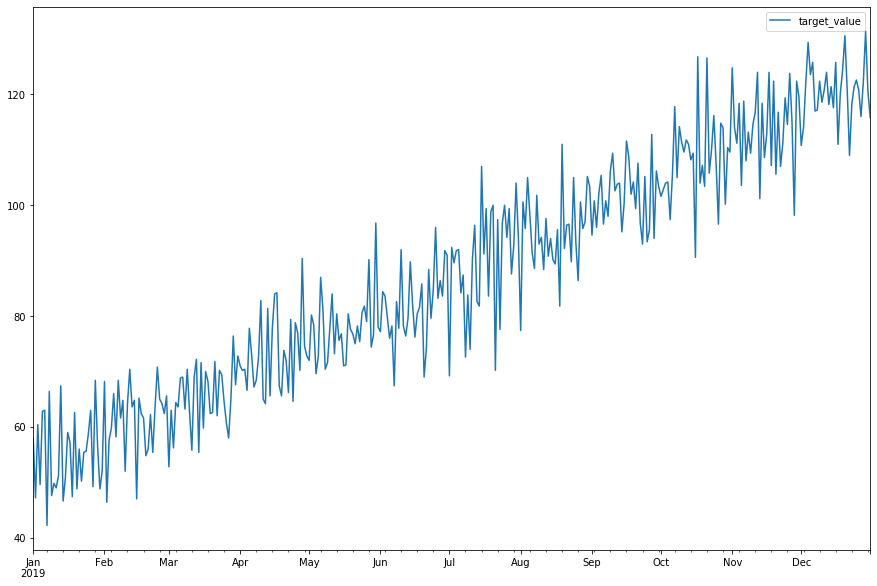

In [12]:
import pandas as pd 
import numpy as np
import random

time = np.arange(250)
values = time*0.4
noise = np.random.randn(250)*100
values += noise

# plot_time_series(time, values, "Upward Trend")
############################################################

results = np.arange(365)*0.2
noise = np.random.poisson(lam=50, size=365)
results += noise

dates = pd.date_range('20190101', periods=365)
# 약간의 upstream에 noise를 추가
df = pd.DataFrame({'item_id': 'item20',
                   'sales_quantity': results}, index=dates)
print(df)
df.plot(figsize=(15,10))


## Generate normal trend data 

In [131]:
import pandas as pd 
import numpy as np
import random
import datetime
import boto3

bucketName='forecast-demogo-bucket'
region='ap-northeast-2'
session = boto3.Session(region_name=region) 
s3 = session.client('s3')

df_total=pd.DataFrame()
# dates = pd.date_range('20190101', periods=365)
start = datetime.datetime.strptime("2019/01/01", "%Y/%m/%d")
end = datetime.datetime.strptime("2019/12/31", "%Y/%m/%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days+1)]

# print(start.strftime('%m/%d/%y'))
# print(dates[0])

  
for i in range(300):
    r_range = random.randrange(150, 1000)
    df = pd.DataFrame({'timestamp': [date.strftime('%Y/%m/%d') for date in date_generated],
                        'item_id': 'item'+str(501+i),
                       'sales_quantity': [random.randrange(r_range-100,r_range) for j in range(365)]})
    
    df_total=df_total.append(df)


df_total.to_csv('data/normal_trend_data.csv')
# s3.upload_file('data/normal_trend_data.csv', bucketName, 'normal_trend_data.csv')

01/01/19
2019-01-01 00:00:00


## Generate spike trend data

In [89]:
import pandas as pd 
import numpy as np
import random
from datetime import timedelta, date, datetime
import boto3

bucketName='forecast-demogo-bucket'
region='ap-northeast-2'
session = boto3.Session(region_name=region) 
s3 = session.client('s3')

def random_date(first_date, second_date):
    first_timestamp = int(first_date.timestamp())
    second_timestamp = int(second_date.timestamp())
    random_timestamp = random.randint(first_timestamp, second_timestamp)
    return datetime.fromtimestamp(random_timestamp)


start_dt = datetime.strptime("2019-01-01", "%Y-%m-%d")
end_dt = datetime.strptime("2019-12-31", "%Y-%m-%d")


df_total=pd.DataFrame()
dates = pd.date_range('20190101', periods=365)

for i in range(200):
    
    r_range = random.randrange(150, 1000)
    df = pd.DataFrame({'item_id': 'item'+str(801+i),
                       'sales_quantity': [random.randrange(r_range-100,r_range) for j in range(365)]}, index=dates)
    for k in range(random.randrange(2,10)):
        rn = random.randrange(1,31)
        dt1 = random_date(start_dt, end_dt)
        dt2 = dt1 + timedelta(days=rn)
        df.loc[dt1:dt2,['sales_quantity']] = df.loc[dt1:dt2,['sales_quantity']]*random.randint(2,5)
    df_total=df_total.append(df)
    

df_total.to_csv('data/spike_trend_data.csv', index=True, header=False)
s3.upload_file('data/spike_trend_data.csv', bucketName, 'spike_trend_data.csv')

## Gen Data (all together)

In [138]:
import pandas as pd 
import numpy as np
import random
import boto3

bucketName='forecast-demogo-bucket'
region='ap-northeast-2'
session = boto3.Session(region_name=region) 
s3 = session.client('s3')

df_total=pd.DataFrame()
# dates = pd.date_range('20180101', periods=365*2)
start = datetime.datetime.strptime("2018/01/01", "%Y/%m/%d")
end = datetime.datetime.strptime("2019/12/31", "%Y/%m/%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days+1)]

def random_date(first_date, second_date):
    first_timestamp = int(first_date.timestamp())
    second_timestamp = int(second_date.timestamp())
    random_timestamp = random.randint(first_timestamp, second_timestamp)
    return datetime.fromtimestamp(random_timestamp)


n=1 #Base number
item_num1=500 #Numbers of items for 1day promotion
item_num2=500 #Numbers of items for 2day promotion
item_num3=1000 #Numbers of itmes for steady increasing trend
item_num4=500 #Numbers of items for stable trend

# Generate special day(1day promotion a week) trend data 
for i in range(item_num1):
    data_list = []
    
    tg_date = random.randrange(6)

    tg_date_value = random.randrange(200, 500)
    tg_date_value_gap = random.randrange(10, 200)
    
    nm_date_value = random.randrange(150)
    nm_date_value_gap = random.randrange(1,50)
    
    for day in date_generated:
        if(day.weekday() == tg_date):
            data_list.append(random.sample(range(tg_date_value,tg_date_value+tg_date_value_gap),1)[0])
        else:
            data_list.append(random.sample(range(nm_date_value,nm_date_value+nm_date_value_gap),1)[0])
    
    df_1day = pd.DataFrame({'timestamp': [date.strftime('%Y/%m/%d') for date in date_generated],
                            'item_id': 'item'+str(n+i),
                            'target_value': data_list})
    
    df_total=df_total.append(df_1day)


# Generate special day(2day promotion a week) trend data 
n=n+item_num1
for i in range(item_num2):
    data_list = []
    
    list = [0,1,2,3,4,5,6]
    tg_date_list = random.sample(list,2)

    tg_date_value = random.randrange(200, 500)
    tg_date_value_gap = random.randrange(10, 200)
    
    nm_date_value = random.randrange(150)
    nm_date_value_gap = random.randrange(1,50)

    for day in date_generated:
        if(day.weekday() == tg_date_list[0] or date.weekday() == tg_date_list[1]):
            data_list.append(random.sample(range(tg_date_value,tg_date_value+tg_date_value_gap),1)[0])
        else:
            data_list.append(random.sample(range(nm_date_value,nm_date_value+nm_date_value_gap),1)[0])

    df_2day = pd.DataFrame({'timestamp': [date.strftime('%Y/%m/%d') for date in date_generated],
                            'item_id': 'item'+str(n+i),
                            'target_value': data_list})
    
    df_total=df_total.append(df_2day)
    
# Generate steady increasing trend data
n=n+item_num2
for i in range(item_num3):
    results = np.arange(365*2)*random.uniform(0, 0.5)
    noise = np.random.randn(365*2)*random.randrange(50)
    noise = [abs(i) for i in noise]

    results += noise
    results = [int(i) for i in results]
    
    df_incline = pd.DataFrame({'timestamp': [date.strftime('%Y/%m/%d') for date in date_generated],
                               'item_id': 'item'+str(n+i),
                               'target_value': results})
    
    df_total=df_total.append(df_incline)

# Generate stable trend data
n=n+item_num3
for i in range(item_num4):
    r_range = random.randrange(150, 1000)
    df_normal = pd.DataFrame({'timestamp': [date.strftime('%Y/%m/%d') for date in date_generated],
                              'item_id': 'item'+str(n+i),
                              'target_value': [random.randrange(r_range-100,r_range) for j in range(365*2)]})
    df_total=df_total.append(df_normal)


# Generate spiky trend data
# n=n+item_num
# for i in range(item_num):
    
#     r_range = random.randrange(150, 1000)
#     df_spiky = pd.DataFrame({'item_id': 'item'+str(n+i),
#                        'sales_quantity': [random.randrange(r_range-100,r_range) for j in range(365*2)]}, index=dates)
#     for k in range(random.randrange(2,10)):
#         rn = random.randrange(1,31)
#         dt1 = random_date(start_dt, end_dt)
#         dt2 = dt1 + timedelta(days=rn)
#         df_spiky.loc[dt1:dt2,['target_value']] = df_spiky.loc[dt1:dt2,['sales_quantity']]*random.randint(2,5)
#     df_total=df_total.append(df_spiky)
    

df_total.to_csv('data/raw_data/forecast_data.csv', index=False, header=True)
s3.upload_file('data/raw_data/forecast_data.csv', bucketName, 'raw_data/forecast_data.csv')